In [1]:
# this is for Airbnb boston data analysis and this work would be one of the outcome of the Udicity data scientist nanodegree project 

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.lib.histograms import histogram
from numpy import size



In [2]:
listingsBostonDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/listingsBoston.csv')
calendarBostonDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/calendarBoston.csv')
reviewsBostonDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/reviewsBoston.csv')
listingsSeattleDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/listingsSeattle.csv')
calendarSeattleDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/calendarSeattle.csv')
reviewsSeattleDf = pd.read_csv('C:/Users/Petar/Desktop/DataScience/Udacity/Project1/reviewsSeattle.csv')

# Getting to know the datasets

In [3]:
print("Shape of listings Boston:", listingsBostonDf.shape)
print("Shape of listings Seattle", listingsSeattleDf.shape)
print("Shape of calendar Boston", calendarBostonDf.shape)
print("Shape of calendar Seattle", calendarSeattleDf.shape)
print("Shape of reviews Boston", reviewsBostonDf.shape)
print("Shape of reviews Seattle", reviewsSeattleDf.shape)


Shape of listings Boston: (3585, 95)
Shape of listings Seattle (3818, 92)
Shape of calendar Boston (1308890, 4)
Shape of calendar Seattle (1393570, 4)
Shape of reviews Boston (68275, 6)
Shape of reviews Seattle (84849, 6)


Join the datasets

In [4]:
listingsBostonDf["City"] = "Boston"
listingsSeattleDf["City"] = "Seattle"

listingsDf = pd.concat([listingsBostonDf, listingsSeattleDf], axis=0)

calendarBostonDf["City"] = "Boston"
calendarSeattleDf["City"] = "Seattle"

calendarDf = pd.concat([calendarBostonDf, calendarSeattleDf], axis=0)

reviewsBostonDf["City"] = "Boston"
reviewsSeattleDf["City"] = "Seattle"

reviewsDf = pd.concat([reviewsBostonDf, reviewsSeattleDf], axis=0)


In [5]:
#New datasets
print("Shape of listings:", listingsDf.shape)
print("Shape of calendar", calendarDf.shape)
print("Shape of reviews", reviewsDf.shape)

Shape of listings: (7403, 96)
Shape of calendar (2702460, 5)
Shape of reviews (153124, 7)


Looking at null values

In [6]:
#Finding out if there are rows which contain only null values
print("Columns in 'listingsDf'with only missing values:", set(listingsDf.columns[listingsDf.isnull().mean() == 1]))
print("Columns in 'calendarDf'with only missing values:", set(calendarDf.columns[calendarDf.isnull().mean() == 1]))
print("Columns in 'reviewsDf'with only missing values:", set(reviewsDf.columns[reviewsDf.isnull().mean() == 1]))

Columns in 'listingsDf'with only missing values: {'license'}
Columns in 'calendarDf'with only missing values: set()
Columns in 'reviewsDf'with only missing values: set()


In [7]:
#Dropping value with only null values
listingsDf = listingsDf.drop(['license'], axis=1)

In [8]:
#Check the percentage of missing values by columns in the dataset
print('Listings:\n', listingsDf.isnull().sum().sort_values(ascending=False)[:10] / listingsDf.shape[0])
print('\nCalendar: \n', calendarDf.isnull().sum().sort_values(ascending=False)[:5] / calendarDf.shape[0])
print('\nReview: \n', reviewsDf.isnull().sum().sort_values(ascending=False)[:10] / reviewsDf.shape[0])

Listings:
 square_feet                     0.979333
interaction                     0.725652
access                          0.716872
house_rules                     0.676753
monthly_price                   0.675132
weekly_price                    0.608132
security_deposit                0.566662
jurisdiction_names              0.484263
neighbourhood_group_cleansed    0.484263
has_availability                0.484263
dtype: float64

Calendar: 
 price         0.416243
listing_id    0.000000
date          0.000000
available     0.000000
City          0.000000
dtype: float64

Review: 
 comments         0.000464
listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
City             0.000000
dtype: float64


In [9]:
#describe
listingsDf.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,7.403000e+03,7.403000e+03,7.403000e+03,7401.000000,7401.000000,7403.000000,7403.000000,7403.000000,7373.000000,7387.000000,...,7403.000000,5943.000000,5922.000000,5932.000000,5925.000000,5934.000000,5926.000000,5926.000000,7403.000000,6020.000000
mean,6.950001e+06,2.016049e+13,2.021053e+07,32.222537,32.222537,45.067727,-97.515448,3.200189,1.241150,1.282659,...,20.684047,93.316002,9.540865,9.417229,9.721181,9.733569,9.518056,9.319777,7.686073,2.028161
std,4.052397e+06,4.009296e+08,1.962309e+07,123.585161,123.585161,2.643568,25.613198,1.890166,0.549408,0.823251,...,36.733024,8.207451,0.821783,0.999271,0.682247,0.656589,0.775312,0.892824,21.465871,1.968696
min,3.335000e+03,2.016010e+13,4.193000e+03,0.000000,0.000000,42.235942,-122.417219,1.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,3.864100e+06,2.016010e+13,4.343164e+06,1.000000,1.000000,42.345668,-122.330837,2.000000,1.000000,1.000000,...,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.590000
50%,7.035240e+06,2.016010e+13,1.448650e+07,1.000000,1.000000,47.542907,-122.276419,2.000000,1.000000,1.000000,...,7.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.370000
75%,9.500804e+06,2.016091e+13,3.028359e+07,4.000000,4.000000,47.624460,-71.079518,4.000000,1.000000,2.000000,...,23.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.890000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,47.733358,-71.000100,16.000000,8.000000,7.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000


It is noticed that price variables are treated as strings as they begin with a '$'. They need to be converted into floats

In [10]:
listingsDf['price'] = listingsDf['price'].str.replace('$', '').str.replace(',', '')
listingsDf['price'] = listingsDf['price'].astype(float)

listingsDf['cleaning_fee'] = listingsDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
listingsDf['cleaning_fee'] = listingsDf['cleaning_fee'].astype(float)

listingsDf['weekly_price'] = listingsDf['weekly_price'].str.replace('$', '').str.replace(',', '')
listingsDf['weekly_price'] = listingsDf['weekly_price'].astype(float)

listingsDf['monthly_price'] = listingsDf['monthly_price'].str.replace('$', '').str.replace(',', '')
listingsDf['monthly_price'] = listingsDf['monthly_price'].astype(float)

listingsDf['security_deposit'] = listingsDf['security_deposit'].str.replace('$', '').str.replace(',', '')
listingsDf['security_deposit'] = listingsDf['security_deposit'].astype(float)


<ipython-input-10-eef3f38105c2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsDf['price'] = listingsDf['price'].str.replace('$', '').str.replace(',', '')
<ipython-input-10-eef3f38105c2>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsDf['cleaning_fee'] = listingsDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
<ipython-input-10-eef3f38105c2>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsDf['weekly_price'] = listingsDf['weekly_price'].str.replace('$', '').str.replace(',', '')
<ipyth

In [11]:
listingsBostonDf['price'] = listingsBostonDf['price'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['price'] = listingsBostonDf['price'].astype(float)

listingsBostonDf['cleaning_fee'] = listingsBostonDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['cleaning_fee'] = listingsBostonDf['cleaning_fee'].astype(float)

listingsBostonDf['weekly_price'] = listingsBostonDf['weekly_price'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['weekly_price'] = listingsBostonDf['weekly_price'].astype(float)

listingsBostonDf['monthly_price'] = listingsBostonDf['monthly_price'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['monthly_price'] = listingsBostonDf['monthly_price'].astype(float)

listingsBostonDf['security_deposit'] = listingsBostonDf['security_deposit'].str.replace('$', '').str.replace(',', '')
listingsBostonDf['security_deposit'] = listingsBostonDf['security_deposit'].astype(float)

listingsSeattleDf['price'] = listingsSeattleDf['price'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['price'] = listingsSeattleDf['price'].astype(float)

listingsSeattleDf['cleaning_fee'] = listingsSeattleDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['cleaning_fee'] = listingsSeattleDf['cleaning_fee'].astype(float)

listingsSeattleDf['weekly_price'] = listingsSeattleDf['weekly_price'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['weekly_price'] = listingsSeattleDf['weekly_price'].astype(float)

listingsSeattleDf['monthly_price'] = listingsSeattleDf['monthly_price'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['monthly_price'] = listingsSeattleDf['monthly_price'].astype(float)

listingsSeattleDf['security_deposit'] = listingsSeattleDf['security_deposit'].str.replace('$', '').str.replace(',', '')
listingsSeattleDf['security_deposit'] = listingsSeattleDf['security_deposit'].astype(float)


<ipython-input-11-9e835e6e8b22>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsBostonDf['price'] = listingsBostonDf['price'].str.replace('$', '').str.replace(',', '')
<ipython-input-11-9e835e6e8b22>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsBostonDf['cleaning_fee'] = listingsBostonDf['cleaning_fee'].str.replace('$', '').str.replace(',', '')
<ipython-input-11-9e835e6e8b22>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listingsBostonDf['weekly_price'] = listingsBostonDf['weekly_price'].str.replace(

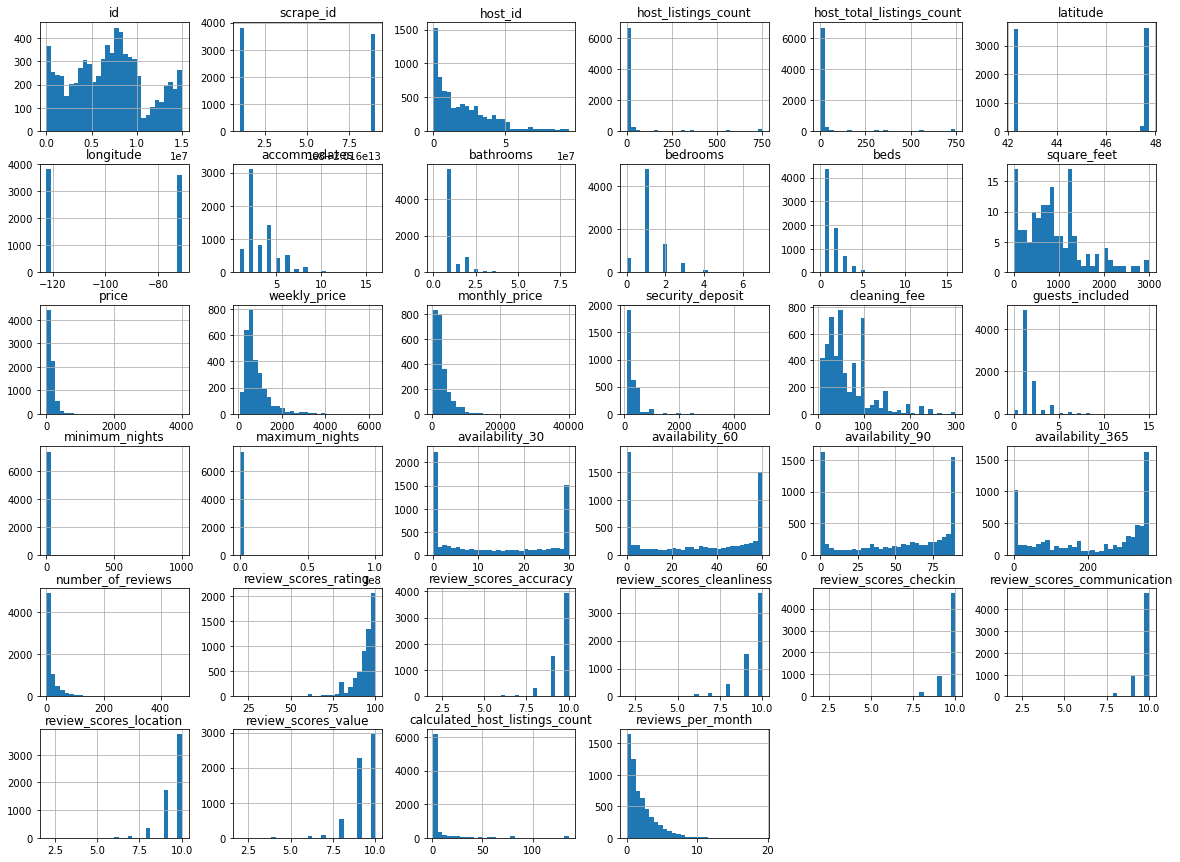

In [12]:
listingsDf.hist(figsize=[20,15], bins=30);

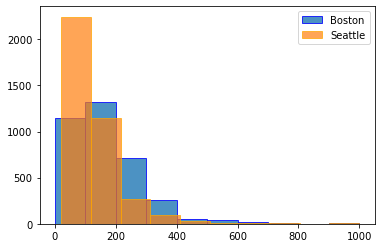

In [13]:
#Visualising Boston and Seatle price range
boston_price = listingsDf['price'].loc[listingsDf['City'] == 'Boston'].values.tolist()
seattle_price = listingsDf['price'].loc[listingsDf['City'] == 'Seattle'].values.tolist()


plt.hist(boston_price, label='Boston', alpha=.8, edgecolor='blue', bins=10, range=(0,1000))
plt.hist(seattle_price, label='Seattle', alpha=.7, edgecolor='orange', bins=10)
plt.legend()

plt.show()


# Question 1
Which factors influience the price of houses the most in Boston and Seattle

In [14]:
most_infl = listingsDf.corr()['price'].sort_values(ascending = False).head(10)[1:]

In [15]:
most_infl_b = listingsBostonDf.corr()['price'].sort_values(ascending = False).head(10)[1:]

In [16]:
most_infl_s = listingsSeattleDf.corr()['price'].sort_values(ascending = False).head(10)[1:]

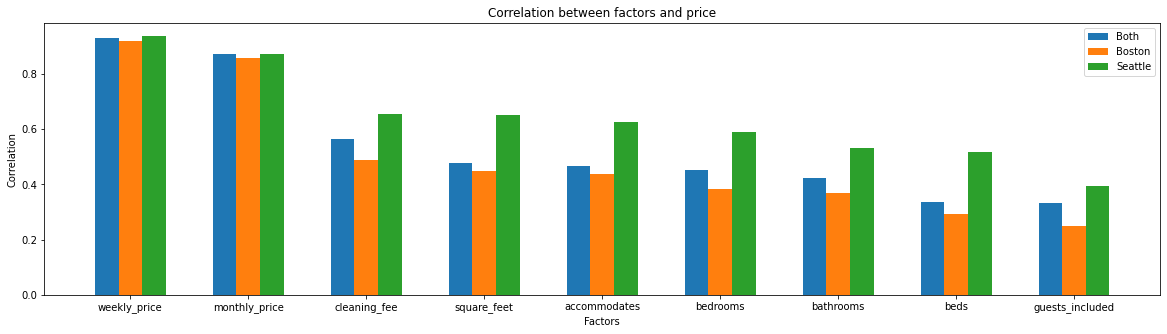

In [17]:
plt.figure(figsize=(20,5))

X = ['weekly_price', 'monthly_price', 'cleaning_fee', 'square_feet', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'guests_included']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, most_infl, 0.2, label = 'Both')
plt.bar(X_axis, most_infl_b, 0.2, label = 'Boston')
plt.bar(X_axis + 0.2, most_infl_s, 0.2, label = 'Seattle')

plt.xticks(X_axis, X)
plt.xlabel("Factors")
plt.ylabel("Correlation")
plt.title("Correlation between factors and price")
plt.legend()
plt.show()

# Question 2
Predict and compare the prices for similar listings for Boston and Seattle

In [44]:
#adjectives taken from http://adjective1.com/for-dining/ and http://adjective1.com/for-rooms/
adj_lst = ['accessible', 'beautiful', 'best', 'better', 'brilliant', 'charming', 'cheap', 'cheerful', 'clean', 'comfortable', 'comfy',
            'connected', 'cosy', 'cozy', 'deluxe', 'desirable', 'elegant', 'excellent', 'favourite', 'fine', 'good', 'gorgeous', 'intimate',
            'large', 'nice', 'pretty', 'private', 'spacious', 'splendid', 'stylish', 'tidy', 'magnificent', 'delicious', 'decent', 'perfect',
            'positive', 'reasonable', 'tremendous', 'bright', 'modern', 'quiet' , 'multicultural', 'public transportation', 'easy access', 
            'shops', 'restaurants', 'welcoming', 'stores', 'shop', 'store', 'gem', 'cafes', 'transport', 'museum', 'family', 'bars', 'roommate',
            'pet', 'dog', 'cat', 'children', 'child', 'crazy', 'toddler', 'kid', 'parking', 'rail station', 'bus station', 'private bathroom',
            'kitchen', 'wifi', 'home office', 'professional', 'laid-back', 'busy', 'chat', 'large']


In [37]:
listingsDf['combinedString'] = listingsDf['name'].astype(str) + ', ' + listingsDf['summary'].astype(str) + ', ' + listingsDf['space'].astype(str) + ', ' + listingsDf['description'].astype(str) + ', '+ listingsDf['neighborhood_overview'].astype(str) + ', ' + listingsDf['notes'].astype(str) + ', ' + listingsDf['transit'].astype(str) + ', ' + listingsDf['interaction'].astype(str) 

In [40]:
listingsDf.drop(['name', 'summary', 'space', 'description', 'notes', 'neighborhood_overview', 'transit', 'interaction'], axis=1)

,id,listing_url,scrape_id,last_scraped,experiences_offered,access,house_rules,thumbnail_url,medium_url,picture_url,...,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,City,combinedString
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,none,"You will have access to 2 bedrooms, a living r...",Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,...,f,NaN,f,moderate,f,f,1,NaN,Boston,"Sunny Bungalow in the City, Cozy, sunny, famil..."
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,none,Apt has one more bedroom (which I use) and lar...,Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,...,f,NaN,t,moderate,f,f,1,1.30,Boston,"Charming room in pet friendly apt, Charming an..."
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,none,"I am living in the apartment during your stay,...","I encourage you to use my kitchen, cooking and...",https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,https://a2.muscache.com/im/pictures/6ae8335d-9...,...,f,NaN,f,moderate,t,f,1,0.47,Boston,"Mexican Folk Art Haven in Boston, Come stay wi..."
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,none,The basement has a washer dryer and gym area. ...,- The bathroom and house are shared so please ...,https://a2.muscache.com/im/pictures/39764190-1...,https://a2.muscache.com/im/pictures/39764190-1...,https://a2.muscache.com/im/pictures/39764190-1...,...,f,NaN,f,moderate,f,f,1,1.00,Boston,"Spacious Sunny Bedroom Suite in Historic Home,..."
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,none,You will have access to the front and side por...,"Please no smoking in the house, porch or on th...",https://a1.muscache.com/im/pictures/97154760/8...,https://a1.muscache.com/im/pictures/97154760/8...,https://a1.muscache.com/im/pictures/97154760/8...,...,f,NaN,f,flexible,f,f,1,2.25,Boston,"Come Home to Boston, My comfy, clean and relax..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,none,NaN,NaN,https://a2.muscache.com/ac/pictures/103217071/...,https://a2.muscache.com/im/pictures/103217071/...,https://a2.muscache.com/ac/pictures/103217071/...,...,f,WASHINGTON,f,strict,f,f,8,0.30,Seattle,"3BR Mountain View House in Seattle, Our 3BR/2B..."
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,none,NaN,NaN,https://a2.muscache.com/ac/pictures/626d4b1f-6...,https://a2.muscache.com/im/pictures/626d4b1f-6...,https://a2.muscache.com/ac/pictures/626d4b1f-6...,...,f,WASHINGTON,f,moderate,f,f,1,2.00,Seattle,"Portage Bay View!-One Bedroom Apt, 800 square ..."
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,none,NaN,NaN,https://a2.muscache.com/ac/pictures/a5974f04-2...,https://a2.muscache.com/im/pictures/a5974f04-2...,https://a2.muscache.com/ac/pictures/a5974f04-2...,...,f,WASHINGTON,f,moderate,f,f,1,NaN,Seattle,"Private apartment view of Lake WA, Very comfor..."
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,none,NaN,NaN,https://a2.muscache.com/ac/pictures/202e4ad6-b...,https://a2.muscache.com/im/pictures/202e4ad6-b...,https://a2.muscache.com/ac/pictures/202e4ad6-b...,...,f,WASHINGTON,f,moderate,f,f,1,NaN,Seattle,"Amazing View with Modern Comfort!, Cozy studio..."


In [43]:
listingsDf.drop(['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location',
                'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_identity_verified', 'host_neighbourhood', 'street'], axis=1)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,City,combinedString
0,12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",...,f,NaN,f,moderate,f,f,1,NaN,Boston,"Sunny Bungalow in the City, Cozy, sunny, famil..."
1,3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,...,f,NaN,t,moderate,f,f,1,1.30,Boston,"Charming room in pet friendly apt, Charming an..."
2,6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...",...,f,NaN,f,moderate,t,f,1,0.47,Boston,"Mexican Folk Art Haven in Boston, Come stay wi..."
3,1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,The basement has a washer dryer and gym area. ...,...,f,NaN,f,moderate,f,f,1,1.00,Boston,"Spacious Sunny Bedroom Suite in Historic Home,..."
4,7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,From Logan Airport and South Station you have...,You will have access to the front and side por...,...,f,NaN,f,flexible,f,f,1,2.25,Boston,"Come Home to Boston, My comfy, clean and relax..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,NaN,NaN,NaN,...,f,WASHINGTON,f,strict,f,f,8,0.30,Seattle,"3BR Mountain View House in Seattle, Our 3BR/2B..."
3814,8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,NaN,...,f,WASHINGTON,f,moderate,f,f,1,2.00,Seattle,"Portage Bay View!-One Bedroom Apt, 800 square ..."
3815,10267360,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,NaN,NaN,NaN,...,f,WASHINGTON,f,moderate,f,f,1,NaN,Seattle,"Private apartment view of Lake WA, Very comfor..."
3816,9604740,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Pa

In [50]:
for adj in adj_lst:
    listingsDf[adj] = 0
    for i in range(listingsDf.shape[0]):
        if adj in str(listingsDf[['combinedString']].iloc[i]).split():
            listingsDf.iloc[i] = 1

In [51]:
listingsDf

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,rail station,bus station,private bathroom,kitchen,wifi,home office,professional,laid-back,busy,chat
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,0,0,0,0,0,0,0,0,0,0
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,0,0,0,0,0,0,0,0,0,0
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,0,0,0,0,0,0,0,0,0,0
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,0,0,0,0,0,0,0,0,0,0
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,0,0,0,0,0,0,0,0,0,0


In [47]:
str(listingsDf[['combinedString']].iloc[0]).split()

['combinedString',
 'Sunny',
 'Bungalow',
 'in',
 'the',
 'City,',
 'Cozy,',
 'sunny,',
 'famil...',
 'Name:',
 '0,',
 'dtype:',
 'object']

In [52]:
listingsDf.to_csv('listingsUdacity')

# Question 3
Find if there are differences in words which might reflect the difference in price

In [38]:
listingsDf

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,City,combinedString
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,NaN,f,moderate,f,f,1,NaN,Boston,"Sunny Bungalow in the City, Cozy, sunny, famil..."
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,NaN,t,moderate,f,f,1,1.30,Boston,"Charming room in pet friendly apt, Charming an..."
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,f,moderate,t,f,1,0.47,Boston,"Mexican Folk Art Haven in Boston, Come stay wi..."
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,NaN,f,moderate,f,f,1,1.00,Boston,"Spacious Sunny Bedroom Suite in Historic Home,..."
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,NaN,f,flexible,f,f,1,2.25,Boston,"Come Home to Boston, My comfy, clean and relax..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,f,WASHINGTON,f,strict,f,f,8,0.30,Seattle,"3BR Mountain View House in Seattle, Our 3BR/2B..."
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,f,WASHINGTON,f,moderate,f,f,1,2.00,Seattle,"Portage Bay View!-One Bedroom Apt, 800 square ..."
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,f,WASHINGTON,f,moderate,f,f,1,NaN,Seattle,"Private apartment view of Lake WA, Very comfor..."
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,f,WASHINGTON,f,moderate,f,f,1,NaN,Seattle,"Amazing View with Modern Comfort!, Cozy studio..."


# Question 4
Which were the best and worst deals on offer?